# Blood Glucose Control - EDA

**Name:** Alyssa D'Souza



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [1]:
import pandas as pd

# Read in the first patient's data
df_500030 = pd.read_csv("../data/gluroo_500030.csv")
# We can use the pid (Patient ID) column to identify the patient
df_500030["pid"] = 500030

# Read in the second patient's data
df_679372 = pd.read_csv("../data/gluroo_679372.csv")
df_679372["pid"] = 679372

# Combine the two dataframes into one data set
bgl_data = pd.concat([df_500030, df_679372], ignore_index=True)
# Convert date fields to pandas datetime objects
bgl_data["date"] = pd.to_datetime(bgl_data["date"], format="mixed", utc=True)

print(bgl_data.head())

                              date  sender_id    bgl  bgl_date_millis text  \
0 2024-05-01 05:00:27.029000+00:00        NaN  114.0              NaN  NaN   
1 2024-05-01 05:05:27.183000+00:00        NaN  117.0              NaN  NaN   
2 2024-05-01 05:10:26.949000+00:00        NaN  113.0              NaN  NaN   
3 2024-05-01 05:15:27.180000+00:00        NaN  112.0              NaN  NaN   
4 2024-05-01 05:20:27.021000+00:00        NaN  113.0              NaN  NaN   

  template msg_type affects_fob affects_iob  dose_units  food_g  \
0      NaN      NaN         NaN         NaN         NaN     NaN   
1      NaN      NaN         NaN         NaN         NaN     NaN   
2      NaN      NaN         NaN         NaN         NaN     NaN   
3      NaN      NaN         NaN         NaN         NaN     NaN   
4      NaN      NaN         NaN         NaN         NaN     NaN   

   food_glycemic_index dose_automatic  fp_bgl  message_basal_change  \
0                  NaN            NaN     NaN            

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

#### Average BGL Over 24 Hour Period

In this data visualization, the aim is to analyze and display a patient's blood glucose levels (BGL) over the course of a 24-hour period. This approach helps us understand how a patient's BGL fluctuates throughout the day and identify any critical trends, such as periods of hyperglycemia (BGL > 180).

Using a scatter plot to represent each individual blood glucose reading provides insight into where the majority of readings fall, with denser clusters indicating more frequent readings at specific hours of the day over the span of the data collection period.

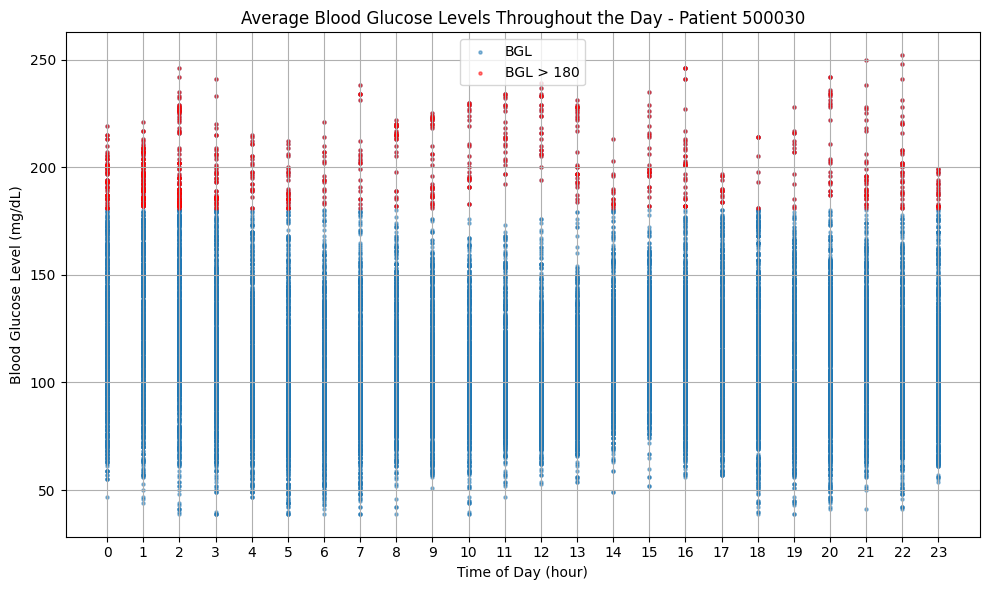

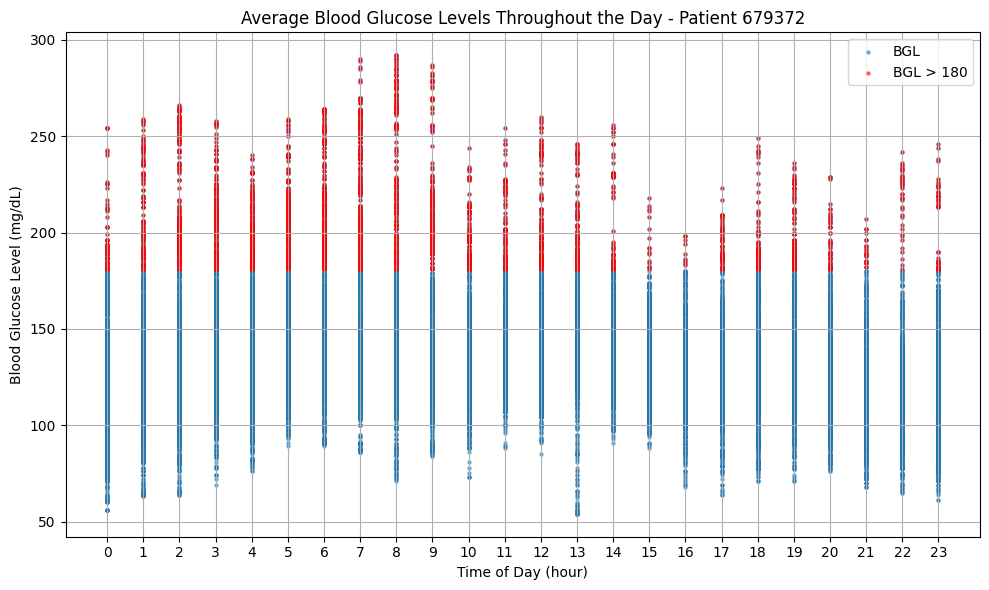

In [2]:
import matplotlib.pyplot as plt


def plot_bgl_over_24h(bgl_data: pd.DataFrame):
    """
    Plots average blood glucose levels (BGL) over a 24-hour period for a given patient, highlighting
    hyperglycemic readings (BGL > 180 mg/dL) in red.
    """
    # Extract the hour of the bgl reading as a separate field
    bgl_data["hour"] = bgl_data["date"].dt.hour

    # Create a scatter plot of bgl vs. hour of the day
    x, y = bgl_data["hour"], bgl_data["bgl"]
    # Plot BGL values above 180 (hyperglycemia) separately to highlight with red color
    hyperglycemic_bgl = bgl_data[bgl_data["bgl"] > 180]
    h_x, h_y = hyperglycemic_bgl["hour"], hyperglycemic_bgl["bgl"]

    # Format and display plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label="BGL", s=5)
    plt.scatter(h_x, h_y, color="red", label="BGL > 180", alpha=0.5, s=5)
    plt.xlabel("Time of Day (hour)")
    plt.ylabel("Blood Glucose Level (mg/dL)")
    plt.title(
        f"Average Blood Glucose Levels Throughout the Day - Patient {bgl_data['pid'].iloc[0]}"
    )
    plt.xticks(range(0, 24))  # Set x-axis to display hours (0 to 23)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Group by Patient ID to display one plot per patient
patient_groups = bgl_data.groupby("pid")

for patient_id, patient_data in patient_groups:
    plot_bgl_over_24h(patient_data)

#### Daily Average BGL Over Time

In this data visualization, the focus is on analyzing and displaying the daily average blood glucose levels (BGL) for a patient over an extended period. By examining daily averages, we can track long-term trends and fluctuations in BGL, providing insight into overall blood sugar control and potential patterns that may indicate health risks.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


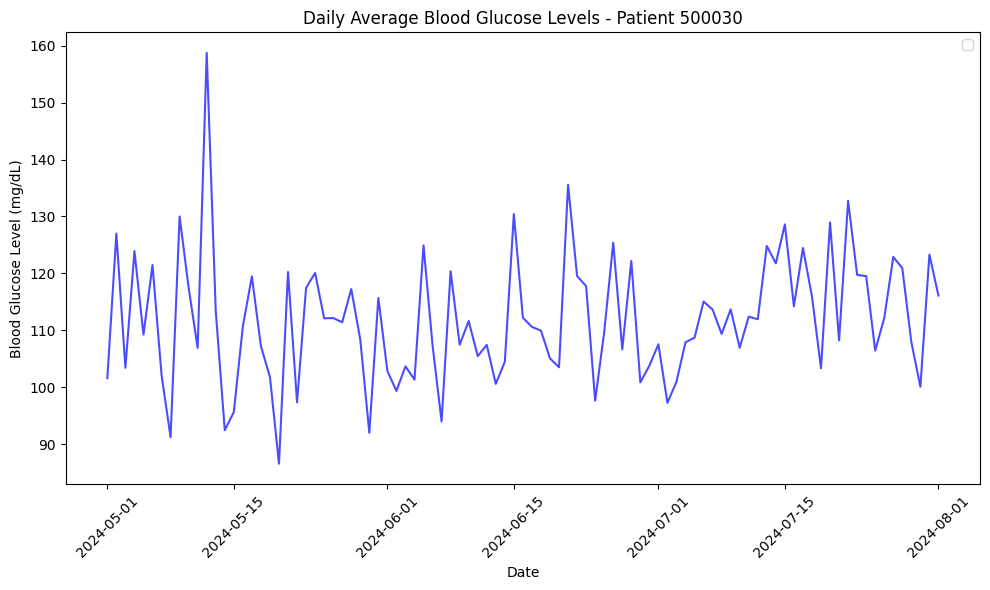

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


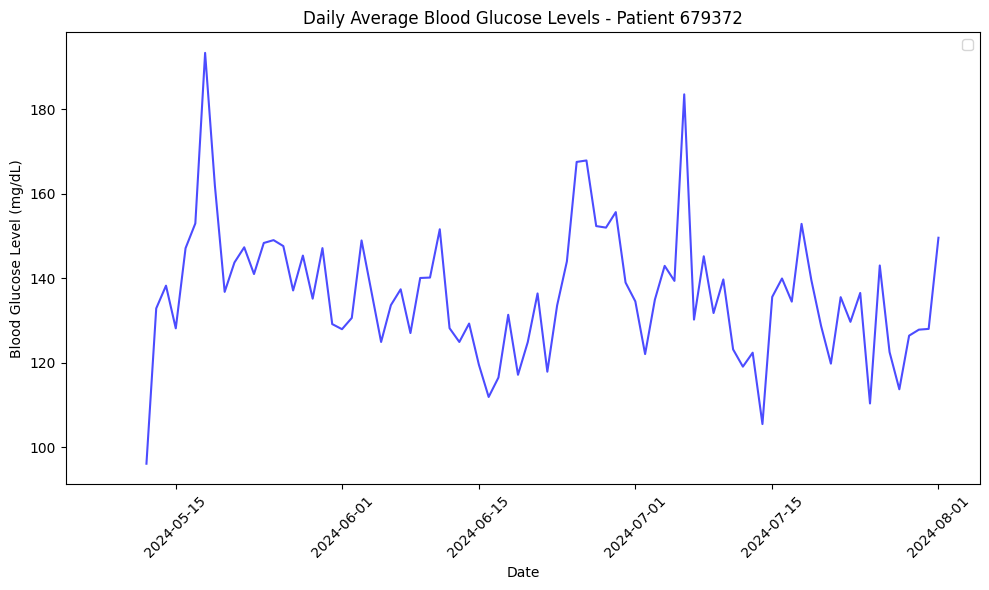

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_daily_average_bgl(bgl_data: pd.DataFrame):
    """
    Plots the daily average blood glucose levels (BGL) for a given patient over time.
    """
    # Resample the data to get entries by daily BGL averages
    bgl_data.set_index("date", inplace=True)
    daily_average_bgl = bgl_data["bgl"].resample("D").mean()

    x, y = daily_average_bgl.index, daily_average_bgl.values

    # Format and display plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color="blue", alpha=0.7)
    plt.xlabel("Date")
    plt.ylabel("Blood Glucose Level (mg/dL)")
    plt.title(f"Daily Average Blood Glucose Levels - Patient {bgl_data['pid'].iloc[0]}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()


# Group by Patient ID to display one plot per patient
patient_groups = bgl_data.groupby("pid")

for patient_id, patient_data in patient_groups:
    plot_daily_average_bgl(patient_data)

#### Average BGL and Insulin Intake Over 24 Hours

This data visualization aims to analyze and display both the average blood glucose levels (BGL) and the average insulin intake for a patient over a 24-hour period on a dual-axis plot. By examining these two metrics together, we can gain insights into their daily patterns and interactions.

This visualization helps identify potential correlations or patterns, such as how changes in insulin dosage might impact blood glucose levels, or vice versa. By analyzing these patterns, clinicians or patients can make more informed decisions regarding insulin management and overall glycemic control.

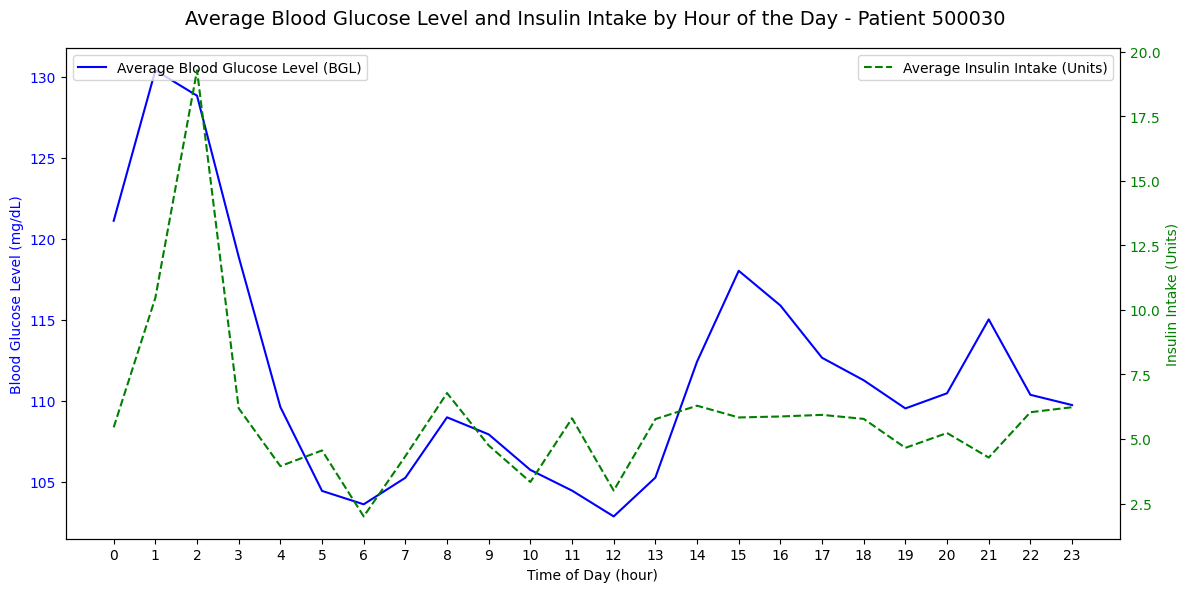

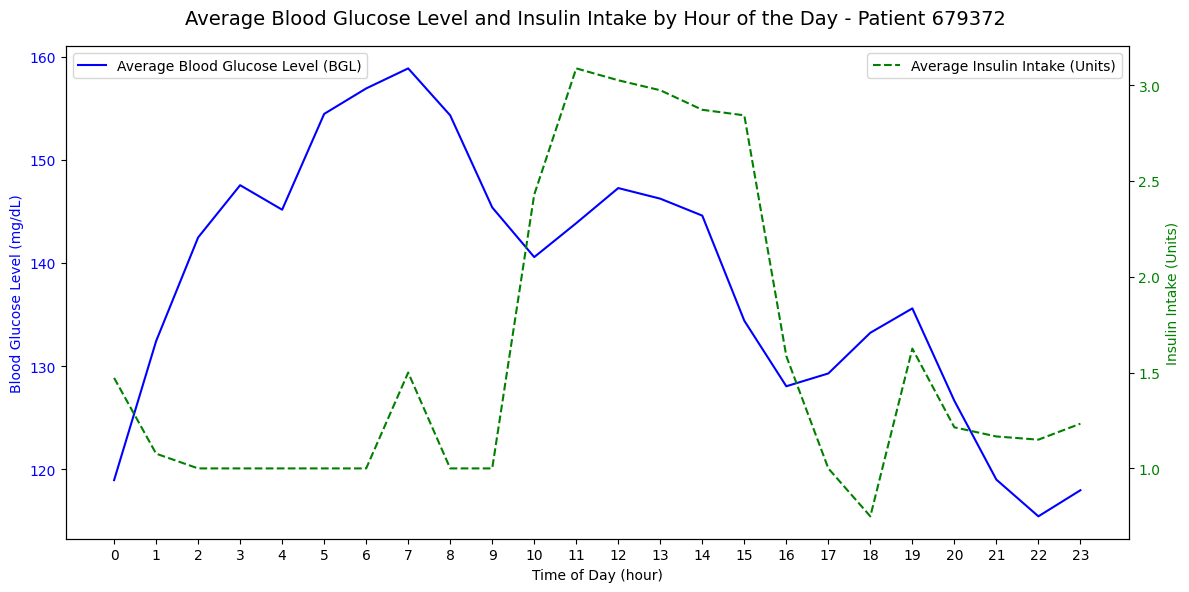

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_bgl_insulin_over_24h(bgl_data: pd.DataFrame):
    """
    Plots average blood glucose levels (BGL) and insulin dose units over a 24-hour period for a given patient.
    """
    # Extract the hour of the bgl reading as a separate field
    bgl_data["hour"] = bgl_data["date"].dt.hour

    # Group by hour of the day to calculate hourly averages
    hourly_avg = patient_data.groupby("hour").agg(
        {
            "bgl": "mean",  # Average blood glucose level
            "dose_units": "mean",  # Average insulin dose
        }
    )

    hour, bgl, insulin = hourly_avg.index, hourly_avg["bgl"], hourly_avg["dose_units"]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Line plot for average BGL on the primary y-axis
    ax1.plot(hour, bgl, color="blue", label="Average Blood Glucose Level (BGL)")
    ax1.set_xlabel("Time of Day (hour)")
    ax1.set_ylabel("Blood Glucose Level (mg/dL)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Create a secondary y-axis for average insulin intake
    ax2 = ax1.twinx()
    ax2.plot(
        hour,
        insulin,
        color="green",
        label="Average Insulin Intake (Units)",
        linestyle="--",
    )
    ax2.set_ylabel("Insulin Intake (Units)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    fig.suptitle(
        f"Average Blood Glucose Level and Insulin Intake by Hour of the Day - Patient {bgl_data['pid'].iloc[0]}",
        fontsize=14,
    )
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.xticks(range(0, 24))
    plt.show()


# Group by Patient ID to display one plot per patient
for patient_id, patient_data in bgl_data.groupby("pid"):
    plot_bgl_insulin_over_24h(patient_data)

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. What's the difference between basal and bolus insulin? Do you have a preference over using one or the other (e.g. effectiveness, side effects, etc)?
2. What's the relation between food weight in grams, glycemic index, and blood glucose levels?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`